## A typical RAG workflow

Vector databases come in handy in building RAG applications, which is a technique that combines the strengths of large language models (LLMs) with external knowledge sources.

In [16]:
import sys
import os, getpass
from openai import OpenAI
from IPython.display import Image
from pprint import pprint
from dotenv import load_dotenv, find_dotenv
from tqdm import tqdm

# Add the project root directory to Python path
project_root = os.path.dirname(os.path.abspath(''))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils import set_api_key

load_dotenv(find_dotenv())  

LANGSMITH_TRACING = os.getenv('LANGSMITH_TRACING')
LANGSMITH_ENDPOINT = os.getenv('LANGSMITH_ENDPOINT')
LANGSMITH_API_KEY = os.getenv('LANGSMITH_API_KEY')
GROQ_API_KEY = set_api_key('GROQ_API_KEY')
OPENAI_API_KEY = set_api_key('OPENAI_API_KEY')

API key found in .env file for GROQ_API_KEY
API key found in .env file for OPENAI_API_KEY


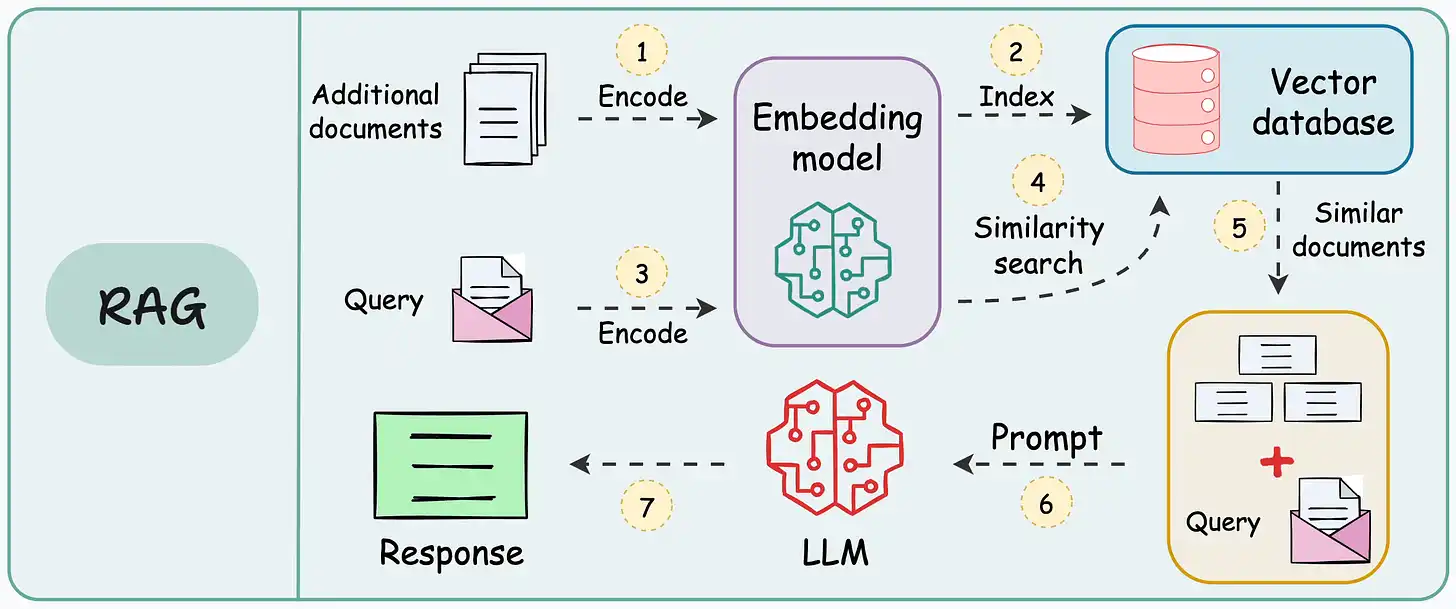

In [ ]:
Image(filename='rag.gif', width = 600, height=400)

- Retrieval: Accessing and retrieving information from a knowledge source, such as a database or memory.

- Augmented: Enhancing or enriching something, in this case, the text generation process, with additional information or context.

- Generation: The process of creating or producing something, in this context, generating text or language.

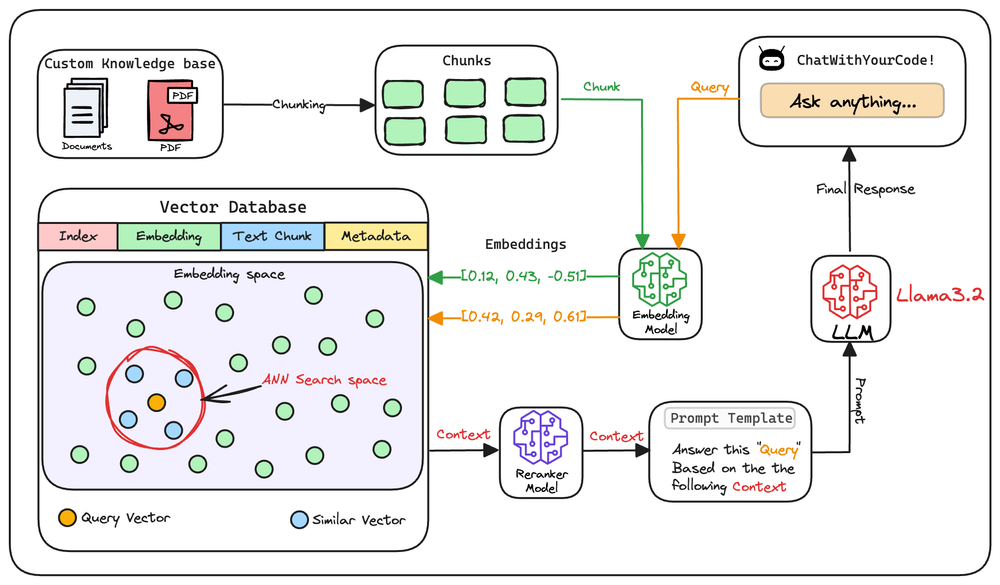

In [4]:
Image(filename='rag_workflow.png', width = 700, height=500)

### Step 1 - Create chunks

We start with some additional knowledge base aka documents, webpages, blogs, code bases that weren't included/seen during the training.

Since, the knowledge base could be very large in size, it is important to ensure that the text fits the input size of the embedding model. 

So an ideal first step is to break down the text into chunks before embedding and storing it in the vector database.

Note: If we don't chunk the document, the entire document will have a single embedding, which won't be of any practical use to retrieve relevant context.

 We can go two ways with this:
 1. Use the OpenAI to first create the tokens our of our documents, and then produce text embeddings using an OPENAI tiktoken model.
 2. We can directly use sentence transformer to directly create the embeddings of the documents.

We will do both of them 

In [18]:
import tiktoken

question = 'What kind of movies do you like?'
document = 'I like action movies.'

In [19]:
def get_tokens_from_text(text:str, encoding:str ) -> list:
    encoding_model = tiktoken.get_encoding(encoding)
    tokens = encoding_model.encode(text)
    print(f'Number of tokens: {len(tokens)}')
    print(f'Tokens: {tokens}')
    

In [20]:
get_tokens_from_text(question, "cl100k_base")

Number of tokens: 8
Tokens: [3923, 3169, 315, 9698, 656, 499, 1093, 30]


In [21]:
from sentence_transformers import SentenceTransformer
model_name = 'distilbert-base-nli-stsb-mean-tokens'
encode_model = SentenceTransformer(model_name)

d:\AI Projects\AI agent using LangGraph\AI-agent-using-langGraph\ai-agent-langgraph-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
def get_tokens_from_sentence_transformer(text, model):
    tokens = model.encode(text)
    print(f'Number of tokens: {len(tokens)}')
    #print(f'Tokens: {tokens}')

In [25]:
get_tokens_from_sentence_transformer(question, encode_model)

Number of tokens: 768
